In [20]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [23]:
f_mnist=keras.datasets.fashion_mnist

In [24]:
(X_train_full,y_train_full),(X_test,y_test)=f_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [37]:
(X_train_full,y_train_full),(X_test,y_test)=f_mnist.load_data()


In [39]:
X_train_full=X_train_full.reshape((X_train_full.shape[0],28,28,1))
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [40]:
X_train_full.shape

(60000, 28, 28, 1)

In [41]:
X_train_full.dtype

dtype('uint8')

In [42]:
X_valid,X_train=X_train_full[:10000]/255.0 ,X_train_full[10000:]/255.0
y_valid,y_train=y_train_full[:10000],y_train_full[10000:]


In [43]:
print("x train: ",X_train.shape)
print("x vaild: ",X_valid.shape)
print("y train: ",y_train.shape)
print("y vaild: ",y_valid.shape)

x train:  (50000, 28, 28, 1)
x vaild:  (10000, 28, 28, 1)
y train:  (50000,)
y vaild:  (10000,)


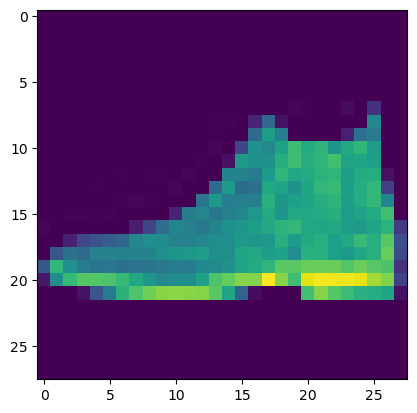

In [44]:
plt.imshow(X_test[0])



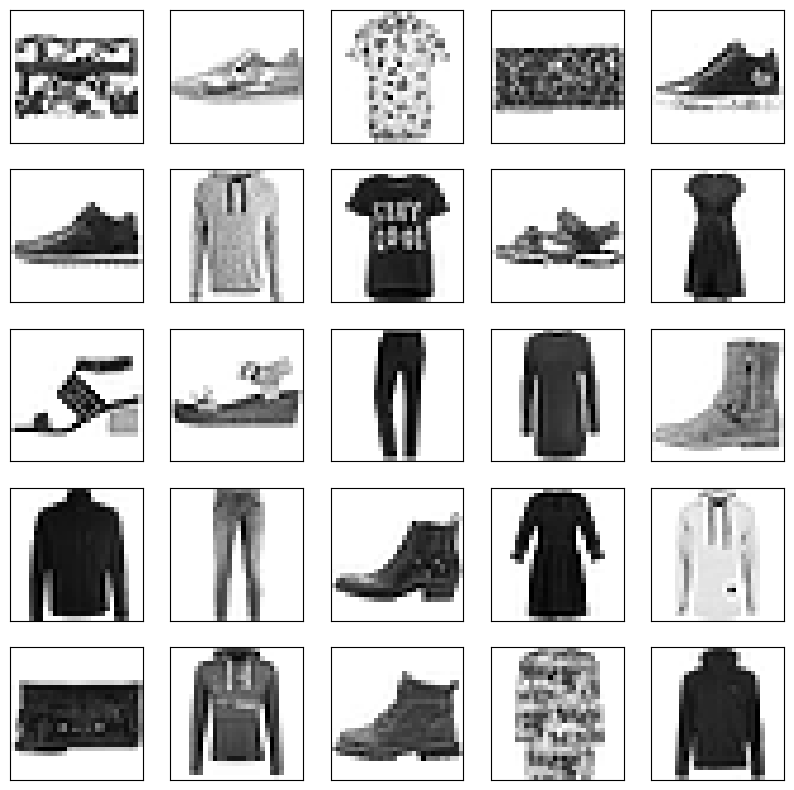

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
plt.show()

In [46]:
from functools import partial
DConv2D=partial(keras.layers.Conv2D,kernel_size=3,activation='relu',padding='SAME')

In [47]:
model = keras.models.Sequential([
    DConv2D(filters=32,kernel_size=7,input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DConv2D(filters=64),
    DConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DConv2D(filters=128),
    DConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),  
    keras.layers.Dense(
        64, 
        activation='relu', 
    ),
    keras.layers.Dropout(rate=0.5), 
    keras.layers.Dense(
        32, 
        activation='relu', 
    ),
    keras.layers.Dropout(rate=0.5), 
    keras.layers.Dense(
        10, 
        activation='softmax' 
    )
])

C:\Users\naren\ansel\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,666 (1.35 MB)

 Trainable params: 354,666 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

In [50]:
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_valid,y_valid))
test_loss,test_acc=model.evaluate(X_valid,y_valid,verbose=2)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.2253 - loss: 2.0887 - val_accuracy: 0.7184 - val_loss: 0.8735
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.5814 - loss: 1.1300 - val_accuracy: 0.7459 - val_loss: 0.6470
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.6670 - loss: 0.8923 - val_accuracy: 0.7834 - val_loss: 0.5703
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7176 - loss: 0.7663 - val_accuracy: 0.8055 - val_loss: 0.5025
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7374 - loss: 0.7153 - val_accuracy: 0.8104 - val_loss: 0.4911
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7561 - loss: 0.6634 - val_accuracy: 0.8336 - val_loss: 0.4701
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7719 - loss: 0.6229 - val_accuracy: 0.8444 - val_loss: 0.4341
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7845 -

In [51]:
print('accuracy',test_acc)

accuracy 0.8751999735832214


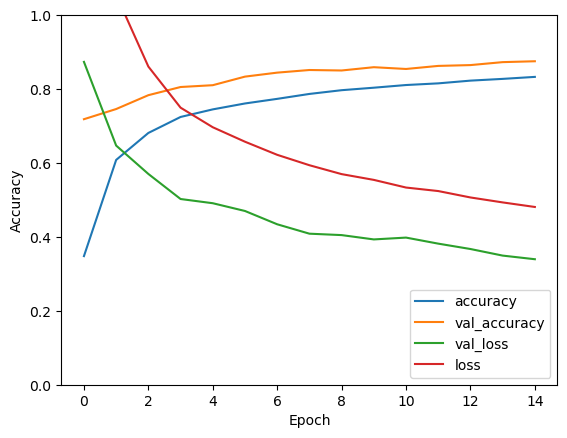

In [52]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [53]:
model.save("model.h5", save_format='h5')

In [55]:
model=tf.keras.models.load_model("model.h5")
x_pred=model.predict(X_valid)
y_pred=np.argmax(x_pred,axis=1)
print("Prediction equal",y_pred[:7])
print("Validation equal",y_valid[:7])

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Prediction equal [9 0 3 3 3 2 7]
Validation equal [9 0 0 3 0 2 7]
